# Importing Packages
### I have imported panda to transform our dataset to a dataframe and work with that. Imported matplotlib to visualize data , Os module to load data from specified path, Scipy for nomalizing and skewing of data.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

path = "F:\Works cse\machineLearning\kaggleHousing" ##declared the path

def load_housing_train_data(housing_path=path):
    csv_path = os.path.join(housing_path,"train.csv")
    return pd.read_csv(csv_path)
def load_housing_test_data(housing_path=path):
    csv_path = os.path.join(housing_path,"test.csv")
    return pd.read_csv(csv_path)
def load_sample_submission(housing_path=path):
    csv_path = os.path.join(housing_path,"sample_submission.csv")
    return pd.read_csv(csv_path)

## Loading Train and Test data

In [2]:
train = load_housing_train_data()
test = load_housing_test_data()
y_test = load_sample_submission()

### Describe() function gives us some statistical information about our dataset. Such as standard deviation , mean, value count in each quartile

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Checking the shape of the data

In [4]:
print ("Size of train data : {}" .format(train.shape))

print ("Size of test data : {}" .format(test.shape))

Size of train data : (1460, 81)
Size of test data : (1459, 80)


### Id column has no relation with predicting housing price. So, i have dropped it from the dataframe. Before doing that i have stored the id column on a variable. I have done it for both train and test set.

In [5]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
y_test.drop("Id",axis = 1, inplace = True)

### Checking The shape of the train and test data after dropping the column to make sure we have dropped exactly one column from each set.

In [6]:
print ("Size of train data after dropping Id: {}" .format(train.shape))
print ("Size of test data after dropping Id: {}" .format(test.shape))

Size of train data after dropping Id: (1460, 80)
Size of test data after dropping Id: (1459, 79)


### Checking relation between salePrice and GrLivArea from the dataset

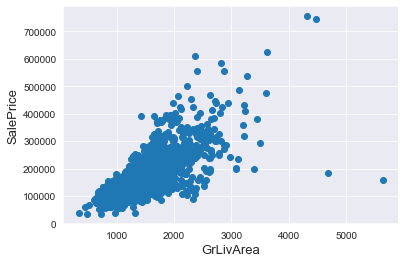

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#### We can see on the graph that there are some outliers on the x axis after 4000. So, we would consider removing those outliers so that our regression model does not learn bias or skewed understanding of the problem and removing these outliers from the training set will allow our model to learn more efficiently.

### Removing The outliers after 4000

In [8]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

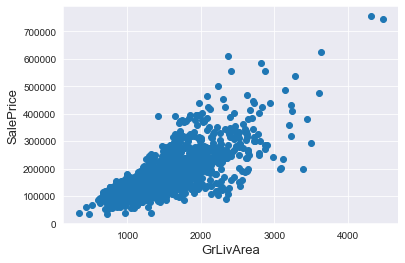

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#### we can see on the plot that the two outliers has been removed.

## Correlation:
#### Finding the correlation of each columns with the sale price

In [10]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
GarageYrBlt      0.487156
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorch   -0.128646
KitchenAbvGr    -0.135946
Name: SalePrice, dtype: float64

#### From this we can say that OverallQual,GrLivArea,TotalBsmtSF,GarageCars,1stFlrSF and GarageArea are highly correlated with SalePrice

### Visualization of the correlated data

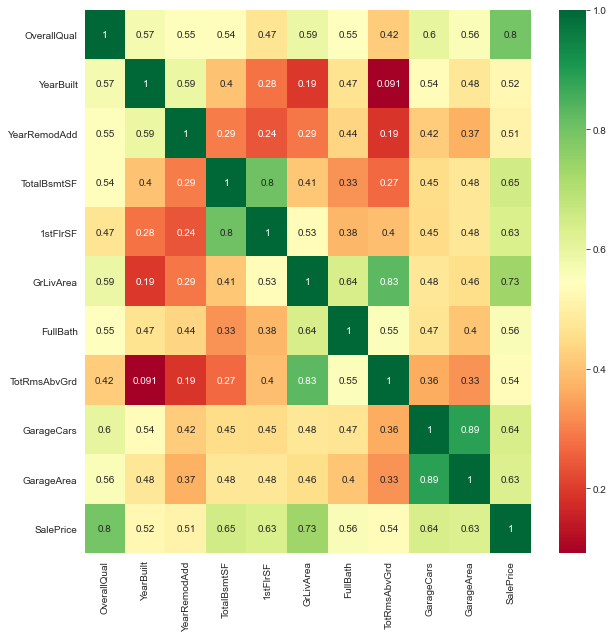

In [11]:
corr_matrix = train.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Checking Skewness:

#### In our dataset not all the feature has same range. They differ from each other. Some feature has a large range and some has small. If skewness exists in our data then our model can not learn efficiently. So we would check skewness in our data with target variable and fix this problem.


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180932.92 and sigma = 79467.79



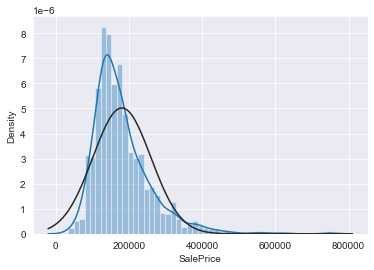

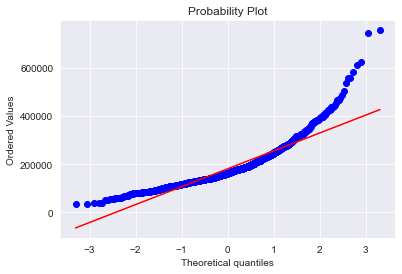

In [12]:
def check_skewness(col):
    sns.distplot(train[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
check_skewness('SalePrice')

#### from the above plots we can see that the distribution is positively skewed. As the black curve on the plot is more deviated to the right we can say that our target variable is skewed. So we would try to fix this problem so that our model makes good decision. 

## Fixing the skewness:
#### Log transformation is a method to remove skewness. What is does is it replaces each variable x with a log(x). It fixes the skewness in our data. So we would perform that operation on SalePrice as it is positive skewed.



 mu = 12.02 and sigma = 0.40



c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


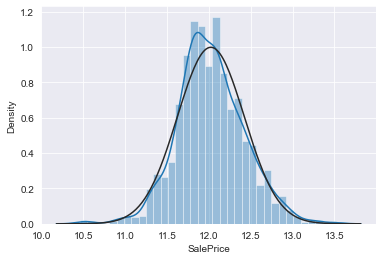

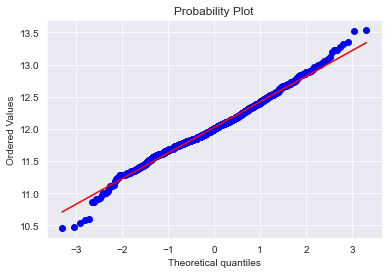

In [13]:
train["SalePrice"] = np.log1p(train["SalePrice"])
check_skewness('SalePrice')

### After performing log operation we can see that the black curve is now fitting the distribution almost perfectly. It seems to be normally distributed. So, We can say that log operation has removed skewness from our data by alot.

## Feature Engineering

### Handling missing data

#### As most of our machine learning models can not operate on empty rows/columns it is necessary to fill the empty columns at first. we would try to find the missing data in our dataset and fill those rows/columns. It would be better if we merge both train and our test set together then perform this operation. It would save our time.

In [14]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


#### On the above code we have merged both train and test set together and stored the label or target variable column on a variable. Then merged both train and test set. Then dropped the target variable from main dataframe. 

In [15]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

Text(0.5, 1.0, 'Percent missing data by feature')

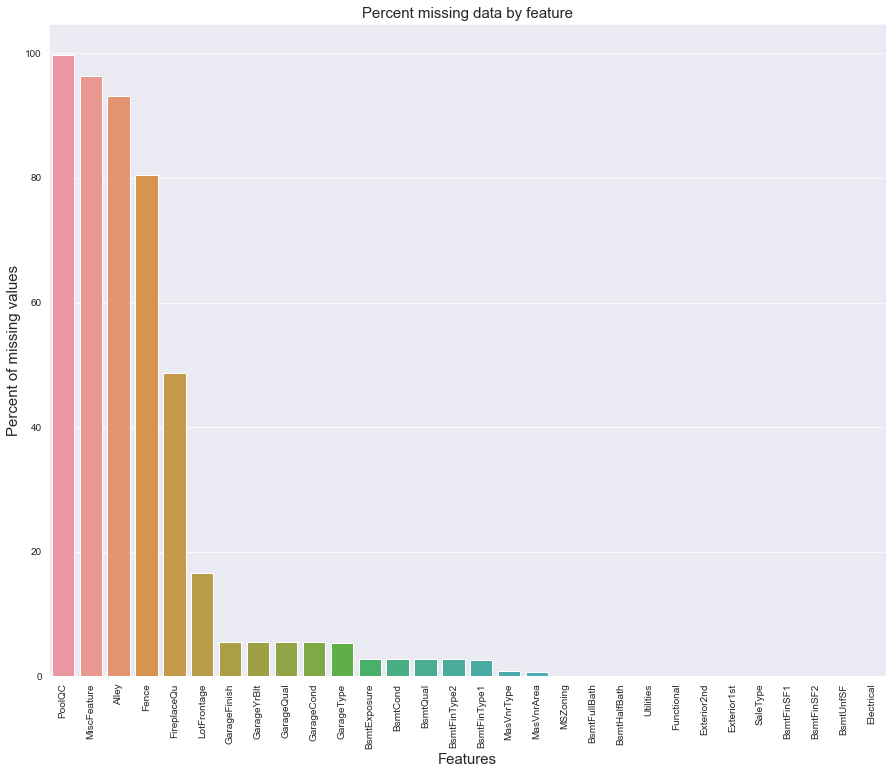

In [16]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

#### As we can see on the above plot PoolQC, MiscFeature, Alley and a lot other feature has null values.

### On the documentation it is mentioned:
#### PoolQc is null means 'No pool'
#### MiscFeature : Data documentation says NA means "no misc feature"
#### Alley : data description says NA means "no alley access"
#### FireplaceQu : data description says NA means "no fireplace"

### So we would replace all these values with none

In [17]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#### For lotFrontage we have filled the missing values by the median LotFrontage of the neighborhood.

In [18]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#### for GarageType, GarageFinish, GarageQual and GarageCond we have Replaced the missing data with None as mentioned in documentation.

In [19]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')

In [20]:
abc = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt', 'GarageArea', 'GarageCars']
all_data.groupby('GarageType')[abc].count()

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageArea,GarageCars
GarageType,,,,,,,
2Types,23,23,23,23,23,23,23
Attchd,1722,1722,1722,1722,1722,1722,1722
Basment,36,36,36,36,36,36,36
BuiltIn,185,185,185,185,185,185,185
CarPort,15,15,15,15,15,15,15
Detchd,779,779,779,779,777,778,778
None,157,157,157,157,0,157,157


### Now for GarageYrBit,  GarageArea and GarageCars we would replace missing data with 0 since no garage = no cars. 

In [21]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)


### For smtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath we would replace the missing values with zero for having no basement.

In [22]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2. For these categorical basement-related features, NaN means that there is no basement. So we would replace the missing values with zero.

In [23]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

### MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [24]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

### Let's check occurance of values in mszoning

In [25]:
all_data['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

### MSZonin: 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [26]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

### Utilities : Since this is a categorical data and most of the data are of same category, Its not gonna effect on model. So we choose to drop it.

In [27]:
all_data = all_data.drop(['Utilities'], axis=1)

### Functional : data description says NA means typical

In [28]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

### Electrical,KitchenQual, Exterior1st, Exterior2nd, SaleType : Since this all are categorical values so its better to replace nan values with the most used keyword.

In [29]:
mode_col = ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_col:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

### MSSubClass : Na most likely means No building class. We can replace missing values with None

In [30]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

### So far we are done handling most of the missing values. Now let's check if there is any more missing values on the features.

In [31]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
Fence,80.425094


### Seems like fence has still 80% data missing.
#### Fence : data description says NA means "no fence"
##### so we would replace the missing values with none


In [32]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [33]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### Now we are sure about the fact that there are no more missing values.

### There are many features such as MSSubClass,OverallCond,YrSold,MoSold that are numerical but categorical. We will convert them to string type so that our model dont get affected by this.

In [34]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [35]:
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

# Encoding 

### Dataset contains non-numerical attributes and as we now machine learning algorithms only work on numercial attributes. So we would have to encode those columns using encoder. I have used onehotencoder from scikit learn to encode those attributes. It would return us a sparse matrix which we would convert to an array and append it with main dataset. Newly added columns would be treated as new feature.

In [36]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [37]:
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


### Now we would add a newfeature combining TotalBsmtSF, 2ndFlrSF and 1stFlrSF. We would add this feature because area related features are important to determine house price.

In [38]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Now we would check for the highly skewed feature again

In [39]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


### From the above list we can see that MiscVal , PoolArea and many other features are positively skewed.

### Other way to fix these skewed features is to perform box cox transformation. It is a transformation of a non-normal dependent features into a normal shape. So we would perform this transformation on on highly skewed feature.

In [40]:
kewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


## Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. This means that we don't need to write out separate equation models for each subgroup. The dummy variables act like 'switches' that turn various parameters on and off in an equation.

### So, we would get some dummy categorical features.

In [41]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2917, 220)

### Now we would create train and test set

In [42]:
train = all_data[:ntrain]
test = all_data[ntrain:]
train.shape

(1458, 220)

### We are done with preprocessing our dataset. Now it's time to train our data

# Model:

### Simple Linear Regression with Regularization (using both L1 and L2 regularization)

#### Our dataset has too many features. So there is a huge chance of overfitting of our model. So we would perform regularization to avoid overfitting. What it does is it shrinks the weight and prevents our model from learning complex equation.

## At first we would import all the necessary libraries

In [43]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

### Cross Validation

#### It's simple way to calculate error for evaluation. We would perform after training

#### KFold( ) splits the train/test data into k consecutive folds, we also have made shuffle attrib to True.

#### cross_val_score ( ) evaluate a score by cross-validation.



In [44]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


# Ridge Regression: We would start with ridge regression
##### It uses L2 regularization technique.

In [45]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



### Feeding our model with train data

In [46]:
KRRMd = KRR.fit(train.values,y_train)

### Predicting housing price

In [47]:
ridge_predict = KRRMd.predict(test.values)

### Cross-validation score

In [48]:
cross_val_score(KRRMd, train, y_train, cv=10)

array([0.911296  , 0.93775156, 0.94065164, 0.90631132, 0.90341775,
       0.90975643, 0.90653951, 0.92022577, 0.93762598, 0.91115471])

# Lasso Regression:
##### It works same as ridge regression but it uses L1 regularization. 

In [49]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1115 (0.0074)



### Feeding our model with train data

In [50]:
lassoModel = lasso.fit(train.values,y_train)

### Predicting housing price

In [51]:
lasso_predict = lassoModel.predict(test.values)

### Cross-validation score

In [52]:
cross_val_score(lassoModel, train, y_train, cv=10)

array([0.91727841, 0.94096521, 0.94019324, 0.91802128, 0.9021841 ,
       0.91576075, 0.916698  , 0.93187769, 0.93725837, 0.91367591])

## Decision Tree (with maximum depth restriction and no restriction): 

### On the code below we have imported decisiontreeregressor library and fitted our data on that model and predicted housing prices.

#### Decision tree regressor with no depth

In [53]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(train.values,y_train)

DecisionTreeRegressor(random_state=0)

In [54]:
regressor.predict(test.values)

array([11.87757552, 11.96400745, 12.10071769, ..., 12.34126329,
       11.58989577, 12.27793274])

### Calculated cross validation score

In [55]:
cross_val_score(regressor, train, y_train, cv=10)

array([0.70150859, 0.79170194, 0.66552537, 0.69441467, 0.76745148,
       0.66123114, 0.74836779, 0.78659338, 0.69524501, 0.7473222 ])

### Decision tree regression with max depth 5

In [56]:
regressor_with_depth = DecisionTreeRegressor(random_state=42,max_depth=5)

regressor_with_depth.fit(train.values,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [94]:
decision_tree_predict = regressor_with_depth.predict(test.values)

In [58]:
cross_val_score(regressor_with_depth, train, y_train, cv=10)

array([0.7294108 , 0.81868324, 0.78197522, 0.75810032, 0.79260053,
       0.75907447, 0.78186092, 0.80326894, 0.76511686, 0.79786193])

# Random Forest (with various estimators count)

### Random forest with estimator count 100

In [59]:
from sklearn.ensemble import RandomForestRegressor


In [60]:
random_forest_1 = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [61]:
random_forest_1.fit(train,y_train)

RandomForestRegressor(random_state=0)

In [93]:
random_forest1_predict = random_forest_1.predict(test.values)

In [63]:
cross_val_score(random_forest_1, train, y_train, cv=10)

array([0.85279512, 0.90995518, 0.89199879, 0.8936875 , 0.86625547,
       0.89145016, 0.88162139, 0.88967184, 0.89854733, 0.85745855])

### Random forest with estimator count 50 

In [64]:
random_forest_2 = RandomForestRegressor(n_estimators = 50, random_state = 0) 

In [65]:
random_forest_2.fit(train,y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [66]:
random_forest_2.predict(test.values)

array([11.73007264, 11.97676135, 12.04509341, ..., 12.00147169,
       11.61805826, 12.31055098])

In [67]:
cross_val_score(random_forest_2, train, y_train, cv=10)

array([0.85248387, 0.90710949, 0.88508339, 0.88815101, 0.86587809,
       0.89078272, 0.88900889, 0.88348484, 0.8950117 , 0.85504091])

#### with low estimator count our model is performing worse than before

# Performing PCA then applying decision tree algorithm

In [68]:
from sklearn.decomposition import PCA

### As six features contribute a large number to the overall variance we have set n_components to 6

In [69]:
pca = PCA(n_components=6)

In [70]:
pca.fit_transform(train)

array([[ 2.20487164, -7.19842252, -3.89990234, -6.00333256,  0.73206292,
         1.50922722],
       [-7.01711777,  0.0924006 , -0.67991455,  5.36950219, -0.64416853,
        -2.50686751],
       [ 3.16539874, -6.81059842, -2.31509436, -5.9784409 ,  0.37419235,
         0.34570235],
       ...,
       [ 5.92112111, -2.65606809, -4.51570814, -2.82591904, -1.919529  ,
        -5.16836673],
       [-5.49082301,  4.53566572, -4.51104295, 10.55106257, -2.79859683,
         6.80197739],
       [-7.75085564, -1.4514647 , -1.5278851 ,  9.18725103, -0.45485186,
        -1.64404869]])

## Applying decision tree after performing pca

In [71]:
regressor_after_pca = DecisionTreeRegressor(random_state=0)

In [72]:
regressor_after_pca.fit(train,y_train)

DecisionTreeRegressor(random_state=0)

In [73]:
regressor_after_pca.predict(test.values)

array([11.87757552, 11.96400745, 12.10071769, ..., 12.34126329,
       11.58989577, 12.27793274])

In [74]:
cross_val_score(regressor_after_pca, train, y_train, cv=10)

array([0.70150859, 0.79170194, 0.66552537, 0.69441467, 0.76745148,
       0.66123114, 0.74836779, 0.78659338, 0.69524501, 0.7473222 ])

In [90]:
(np.expm1(Lasso.predict(test.values)

array([11.68281716, 11.94113593, 12.12654975, ..., 12.06827041,
       11.67348712, 12.3300215 ])

### From the above observation we can see that applying decision tree algorithm after performing pca does not improve our model perfomance

## Making a final prediction using ensemble technique where we combine prediction of multiple model

In [101]:
finalModel = (np.expm1(lasso_predict) + np.expm1(decision_tree_predict) + np.expm1(ridge_predict) + np.expm1(random_forest1_predict)) / 4
finalModel

array([122666.51744462, 159331.10474385, 175959.90918402, ...,
       168671.0723352 , 110682.453971  , 222191.53363324])

## Generating submission file

In [103]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = finalModel
sub.to_csv('submission.csv',index=False)